# Programming Sheet 1: Bayes Decision Theory (40 P)

In this exercise sheet, we will apply Bayes decision theory in the context of small two-dimensional problems. For this, we will make use of 3D plotting. We introduce below the basics for constructing these plots in Python/Matplotlib.

### The function `numpy.meshgrid`

To plot two-dimensional functions, we first need to discretize the two-dimensional input space. One basic function for this purpose is `numpy.meshgrid`. The following code creates a discrete grid of the rectangular surface $ [0,4] \times [0,3]$. The function `numpy.meshgrid` takes the discretized intervals as input, and returns two arrays of size corresponding to the discretized surface (i.e. the grid) and containing the X and Y-coordinates respectively.

In [2]:
import numpy as np
X,Y = np.meshgrid([0,1,2,3,4],[0,1,2,3])
print(X)
print(Y)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]


Note that we can iterate over the elements of the grid by zipping the two arrays `X` and `Y` containing each coordinate. The function `numpy.flatten` converts the 2D arrays to one-dimensional arrays, that can then be iterated element-wise.

In [3]:
print(list(zip(X.flatten(),Y.flatten())))


[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (0, 3), (1, 3), (2, 3), (3, 3), (4, 3)]


### 3D-Plotting

To enable 3D-plotting, we first need to load some modules in addition to `matplotlib`:

In [4]:
import matplotlib
%matplotlib inline
#from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

As an example, we would like to plot the L2-norm function $f(x,y) = \sqrt{x^2 + y^2}$ on the subspace $x,y \in [-4,4]$. First, we create a meshgrid with appropriate size:

In [5]:
R = np.arange(-4,4+0.1,0.1)

X,Y = np.meshgrid(R,R)
print(X.shape,Y.shape)

(81, 81) (81, 81)


Here, we have used a discretization with small increments of 0.1 in order to produce a plot with better resolution. The resulting meshgrid has size (81x81), that is, approximately 6400 points. The function $f$ needs to be evaluated at each of these points. This is achieved by applying element-wise operations on the arrays of the meshgrid. The norm at each point of the grid is therefore computed as:

In [6]:
F = (X**2+Y**2)**.5
print(F.shape)

(81, 81)


The resulting function values are of same size as the meshgrid. Taking `X`,`Y`,`F` jointly results in a list of approximately 6400 triplets representing the x-, y-, and z-coordinates in the three-dimensional space where the function should be plotted. The 3d-plot can now be constructed easily by means of the function `scatter` of `matplotlib.pyplot`.

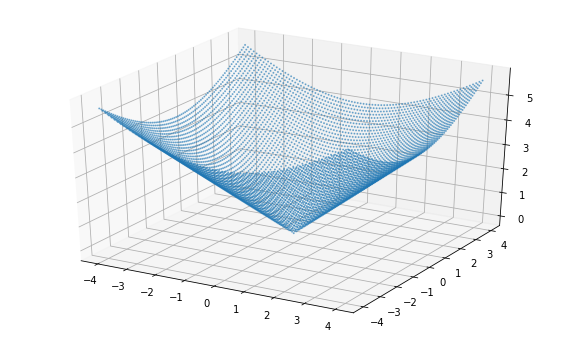

In [7]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.scatter(X,Y,F,s=1,alpha=0.5)

The parameter `s` and `alpha` control the size and the transparency of each data point. Other 3d plotting variants exist (e.g. surface plots), however, the scatter plot is the simplest approach at least conceptually. Having introduced how to easily plot 3D functions in Python, we can now analyze two-dimensional probability distributions with this same tool.

## Exercise 1: Gaussian distributions (5+5+5 P)

Using the technique introduced above, we would like to plot a normal Gaussian probability distribution with mean vector $\mu = (0,0)$, and covariance matrix $\Sigma = I$ also known as standard normal distribution. We consider the same discretization as above (i.e. a grid from -4 to 4 using step size 0.1). For two-dimensional input spaces, the standard normal distribution is given by:
$
p(x,y) = \frac{1}{2\pi}e^{-0.5 (x^2+y^2)}.
$
This distribution sums to $1$ when integrated over $\mathbb{R}^2$. However, it does not sum to $1$ when summing over the discretized space (i.e. the grid). Instead, we can work with a discretized Gaussian-like distribution:
$
P(x,y) = \frac1Z e^{-0.5 (x^2+y^2)} \qquad \text{with} \quad Z = \sum_{x,y} e^{-0.5 (x^2+y^2)}
$
where the sum runs over the whole discretized space.

* **Compute the distribution $P(x,y)$, and plot it.**
* **Compute the conditional distribution $Q(x,y) = P((x,y) | \sqrt{x^2+y^2} \geq 1)$, and plot it.**
* **Marginalize the conditioned distribution $Q(x,y)$ over $y$, and plot the resulting distribution $Q(x)$.**

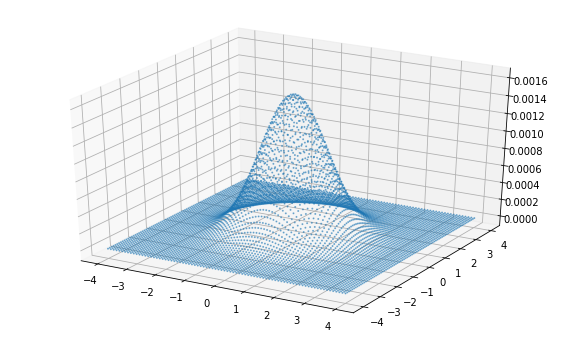

In [8]:
R = np.arange(-4, 4 +0.1, 0.1)
X, Y = np.meshgrid(R, R)

Z = np.exp(-.5*(X**2 + Y**2))
P = Z / np.sum(Z)

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.scatter(X,Y,P,s=1,alpha=0.5)

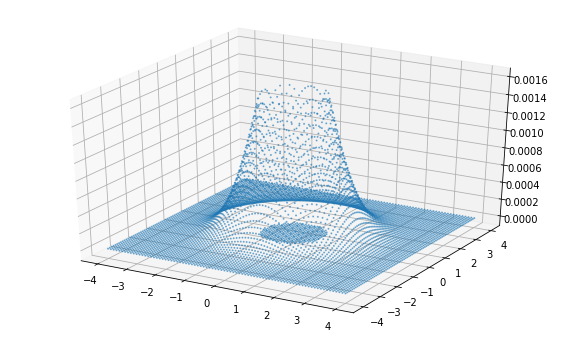

In [9]:
# important - need to normalize
C = np.where(np.sqrt(X**2 + Y**2) >= 1, Z, 0)
Q = C / np.sum(C)

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.scatter(X,Y,Q,s=1,alpha=0.5)

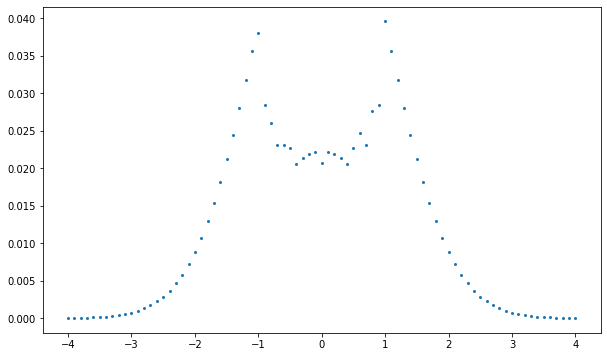

In [10]:
Qx = Q.sum(axis=1)
Qy = Q.sum(axis=0)


fig = plt.figure(figsize=(10,6))
ax = plt.axes()
ax.scatter(X[0,:],Qx,s=4,alpha=1)

## Exercise 2: Bayesian Classification (5+5+5 P)

Let the two coordinates x and y be now representated as a two-dimensional vector $\boldsymbol{x}$. We consider two classes $\omega_1$ and $\omega_2$ with data-generating Gaussian distributions $p(\boldsymbol{x}|\omega_1)$ and $p(\boldsymbol{x}|\omega_2)$ of mean vectors
$$\boldsymbol{\mu}_1 = (-0.5,-0.5) \quad \text{and} \quad \boldsymbol{\mu}_2 = (0.5,0.5)$$
respectively, and same covariance matrix
$$\Sigma = \begin{pmatrix}1.0&0\\0&0.5\end{pmatrix}.$$
Classes occur with probability $P(\omega_1) = 0.9$ and $P(\omega_2) = 0.1$. Analysis tells us that in such scenario, the optimal decision boundary between the two classes should be linear. We would like to verify this computationally by applying Bayes decision theory on grid-like discretized distributions.

* **Using the same grid as in Exercise 1, discretize the two data-generating distributions $p(\boldsymbol{x}|\omega_1)$ and $p(\boldsymbol{x}|\omega_2)$ (i.e. create discrete distributions $P(\boldsymbol{x}|\omega_1)$ and $P(\boldsymbol{x}|\omega_2)$ on the grid), and plot them with different colors.**
* **From these distributions, compute the total probability distribution $P(\boldsymbol{x}) = \sum_{c \in \{1,2\}} P(\boldsymbol{x} | \omega_c) \cdot P(\omega_c)$, and plot it.**
* **Compute and plot the class posterior probabilities $P(\omega_1|\boldsymbol{x})$ and $P(\omega_2|\boldsymbol{x})$, and print the Bayes error rate for the discretized case.**

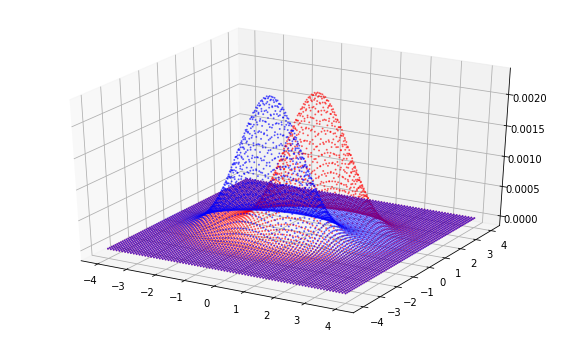

In [11]:
from scipy.stats import multivariate_normal

#represent the X, Y coordinates as a 2D vector
xy = np.column_stack([X.flat, Y.flat])

#create gaussian distributiond with different mu

mu_1 = np.array([-.5, -.5])
mu_2 = np.array([.5, .5])

cov = np.array([[1, 0], [0, .5]])

P_x_w1 = multivariate_normal.pdf(xy, mean=mu_1, cov=cov)
P_x_w2 = multivariate_normal.pdf(xy, mean=mu_2, cov=cov)

#Normalize

P_x_w1_norm = P_x_w1/np.sum(P_x_w1)
P_x_w2_norm = P_x_w2/np.sum(P_x_w2)

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
ax.scatter(X, Y, P_x_w1_norm, s=1, alpha=.5, color="blue")
ax.scatter(X, Y, P_x_w2_norm, s=1, alpha=.5, color="red")
plt.show()

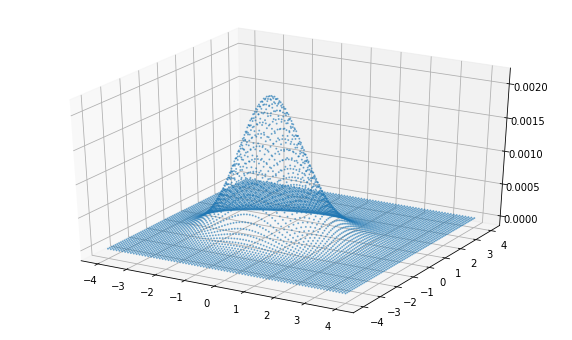

In [12]:
P_w1 = .9
P_w2 = .1

P_total = P_x_w1_norm * P_w1 + P_x_w2_norm * P_w2
P_total_norm = P_total/np.sum(P_total)

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection="3d")
ax.scatter(X, Y, P_total_norm, s=1, alpha=.5)

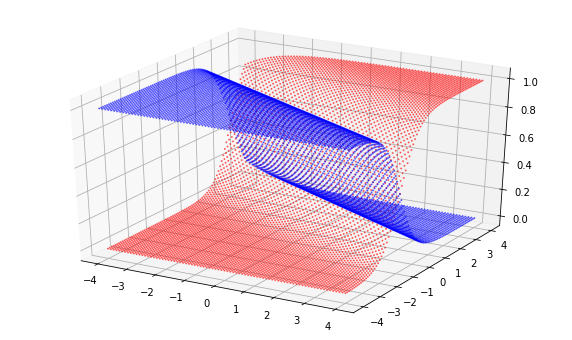

In [13]:
P_w1_x = (P_x_w1_norm * P_w1 )/ P_total
P_w2_x = (P_x_w2_norm * P_w2 )/ P_total

error = np.sum(np.minimum(P_w1_x, P_w2_x) * P_total_norm)

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.scatter(X,Y,P_w1_x,s=1,alpha=0.5,color="blue")
ax.scatter(X,Y,P_w2_x,s=1,alpha=0.5,color="red")

## Exercise 3: Reducing the Variance (5+5 P)

Suppose that the data generating distribution for the second class changes to produce samples much closer to the mean. This variance reduction for the second class is implemented by keeping the first covariance the same (i.e. $\Sigma_1 = \Sigma$) and dividing the second covariance matrix by 4 (i.e. $\Sigma_2 = \Sigma/4$). For this new set of parameters, we can perform the same analysis as in Exercise 2.

* **Plot the new class posterior probabilities $P(\omega_1|\boldsymbol{x})$ and $P(\omega_2|\boldsymbol{x})$ associated to the new covariance matrices, and print the new Bayes error rate.**

Error rate 0.07290780555695715


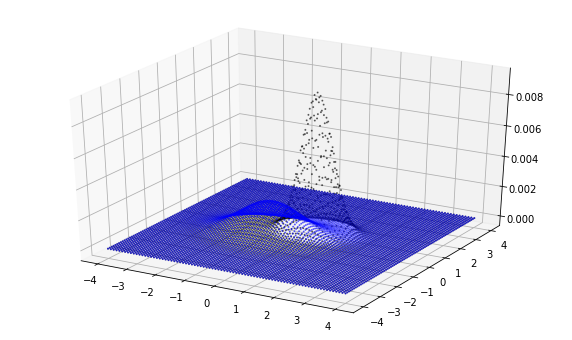

In [14]:
mu_1 = np.array([-.5, -.5])
mu_2 = np.array([.5, .5])

cov1 = np.array([[1, 0], [0, .5]])
cov2 = cov1/4

P_x_w1 = multivariate_normal.pdf(xy, mean=mu_1, cov=cov1)
P_x_w2 = multivariate_normal.pdf(xy, mean=mu_2, cov=cov2)

P_x_w1_norm = P_x_w1/ np.sum(P_x_w1)
P_x_w2_norm = P_x_w2/ np.sum(P_x_w2)

P_x_total = P_x_w1_norm * P_w1 + P_x_w2_norm * P_w2

P_w1_x_post = P_x_w1_norm * P_w1 / P_x_total
P_w2_x_post = P_x_w2_norm * P_w2 / P_x_total

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.scatter(X,Y,P_x_w1_norm,s=1,color = 'blue',alpha=0.5)
ax.scatter(X,Y,P_x_w2_norm,s=1,color = 'black',alpha=0.5)


error = np.sum(np.minimum(P_w1_x_post, P_w2_x_post) * P_x_total)
print("Error rate {}".format(error))

Intuition tells us that by variance reduction and resulting concentration of generated data for class 2 in a smaller region of the input space, it should be easier to predict class 2 with certainty at this location. Paradoxally, in this new "dense" setting, we observe that class 2 does not reach full certainty anywhere in the input space, whereas it did in the previous exercise.

* **Explain this paradox.**

[YOUR EXPLANATION HERE]